In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [3]:
df = load_iris(as_frame=True)

In [4]:
df = pd.DataFrame(df['frame'])

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### TO-DO
* SVM, Linear, OVR
* SVM, Linear, OVO
* SVM, RBF, OVR
* SVM, Poly(d=3), OVR

In [7]:
OneVsRestClassifier?

Object `OneVsRestClassifier` not found.


In [8]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

#### MODEL 1: SVM, Linear, OVR

In [16]:
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.svm import SVC

# By default the Sci-Kit Learn library provides a OVO classifier
# when we use SVM Classifier. But I am going to use the one 
# from sklearn multiclass.

model = SVC(kernel='linear')
ovr_svm = OneVsRestClassifier(model)
ovr_svm.fit(df.drop('target', axis=1), df.target)
ovr_svm.score(df.drop('target', axis=1), df.target)

0.96

#### MODEL 2: SVM, Linear, OVO

In [19]:
model = SVC(kernel='linear')
ovr_svm = OneVsOneClassifier(model)
ovr_svm.fit(df.drop('target', axis=1), df.target)
ovr_svm.score(df.drop('target', axis=1), df.target)

0.9933333333333333

#### MODEL 3: SVM, RBF, OVR

In [22]:
model = SVC(kernel='rbf')
ovr_svm = OneVsOneClassifier(model)
ovr_svm.fit(df.drop('target', axis=1), df.target)
ovr_svm.score(df.drop('target', axis=1), df.target)

0.9733333333333334

#### MODEL 4: SVM, Poly(d=3), OVR

In [25]:
model = SVC(kernel='poly', degree=3)
ovr_svm = OneVsOneClassifier(model)
ovr_svm.fit(df.drop('target', axis=1), df.target)
ovr_svm.score(df.drop('target', axis=1), df.target)

0.9866666666666667

## Plotting

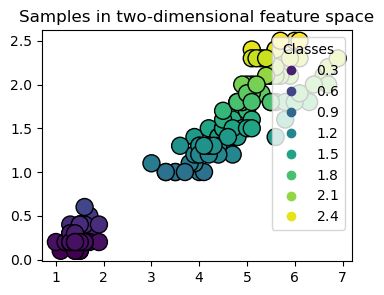

In [34]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(4, 3))
# x_min, x_max, y_min, y_max = -3, 3, -3, 3
# ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

# Plot samples by color and add legend
x = df['petal length (cm)']
y = df['petal width (cm)']
scatter = ax.scatter(x, y, s=150, c=y, label=y, edgecolors="k")
ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
ax.set_title("Samples in two-dimensional feature space")
_ = plt.show()